In [34]:
import numpy as np
from keras.utils import np_utils
import random

# load dataset
x_data = np.load('./Npy_files/x_all.npy')
y_data = np.load('./Npy_files/y_all.npy')

# shuffle
idx = [i for i in range(len(y_data))]
random.shuffle(idx) 

# train : val : test = 6 : 2: 2
p_train = int(len(idx)*0.6) 
p_val = int(len(idx)*0.8)

x_train_idx = idx[:p_train]
x_val_idx = idx[p_train:p_val]
x_test_idx = idx[p_val:]

x_train = x_data[x_train_idx]
x_val = x_data[x_val_idx]
x_test = x_data[x_test_idx]

y_train = y_data[x_train_idx]
y_val = y_data[x_val_idx]
y_test = y_data[x_test_idx]

print("x_train.shape : ", x_train.shape)
print("y_train.shape : ", y_train.shape)
print("x_val.shape : ", x_val.shape)
print("y_val.shape : ", y_val.shape)
print("x_test.shape : ", x_test.shape)
print("y_test.shape : ", y_test.shape)

x_train.shape :  (4674, 19, 500)
y_train.shape :  (4674,)
x_val.shape :  (1558, 19, 500)
y_val.shape :  (1558,)
x_test.shape :  (1558, 19, 500)
y_test.shape :  (1558,)


In [35]:
# one hot encode outputs for classification
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

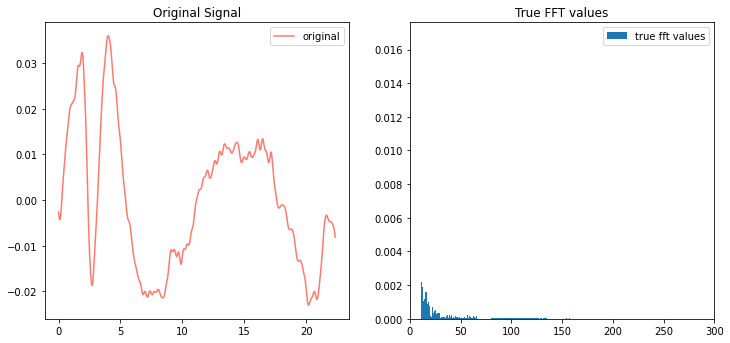

In [36]:
## FFT example

# Import modules
import warnings
import matplotlib.pyplot as plt
from numpy import arange
from scipy.fftpack import fft, fftfreq

# ignore small warnings
warnings.filterwarnings("ignore") 

# signals
samp_rate = 500
Lx = 22.35
x = arange(0, samp_rate) / Lx
y = np.array(x_train[0][0])

# Preparatory steps
freqs = fftfreq(samp_rate)        # 필요한 모든 진동수를 만든다.
mask = freqs > 0                  # 절반의 값을 무시
nwaves = freqs*samp_rate          # 도메인 길이에 따른 파수

# Power Spectrum calculation
fft_vals = fft(y)                               # FFT 계산
fft_norm = fft_vals * (1.0 / samp_rate)         # FFT 계산된 결과를 정규화
fft_theo = 2.0 * abs(fft_norm)                  # 푸리에 계수 계산

# wave y
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('Original Signal')
plt.plot(x, y, color='xkcd:salmon', label='original')
plt.title("Original Signal")
plt.legend()

# Fourier coefficient
plt.subplot(2, 2, 2)
plt.xlim(0, 300)
plt.bar(nwaves[mask], fft_theo[mask], label="true fft values")
plt.title("True FFT values")
plt.legend()

plt.show()

S.shape :  (26, 46)


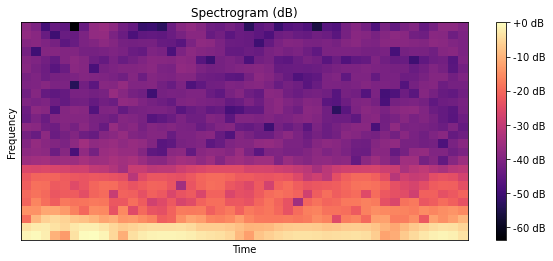

In [37]:
#STFT example
import librosa
import librosa.display

frame_length = 0.10                                     # window_length = 100ms
frame_overlap = 0.02                                    # overlap_length = 20ms
sr = 500                                                # sample rate : 500Hz
input_nfft = int(round(sr * frame_length))
input_overlap = int(round(sr * frame_overlap))

x = np.array(x_train[0][0])
y = librosa.core.stft(x, n_fft=input_nfft, hop_length=input_overlap,center = False) # stft signal transform
S = librosa.power_to_db(y, ref=np.max) # converting Db
print("S.shape : ", S.shape)

plt.figure(figsize=(10,4))
librosa.display.specshow(S, sr=sr, hop_length=input_overlap)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")
plt.show()
plt.close()

In [38]:
## FFT for all

# data FFT
def sig_fft(dataset):
    samp_rate = 500
    fft_dataset = []
    for datas in dataset:
        fft_data = []
        for data in datas:
            y = data
            fft_vals = fft(y)
            fft_norm = fft_vals * (1.0 / samp_rate)
            fft_theo = 2.0 * abs(fft_norm)
            fft_data.append(fft_theo)
            
        fft_dataset.append(fft_data)
        
    return np.array(fft_dataset)


# Fourier Transform
fft_x_train = sig_fft(x_train)
fft_x_val = sig_fft(x_val)
fft_x_test = sig_fft(x_test)

# Change Dim
fft_x_train = fft_x_train.reshape(4674,19,500,1)
fft_x_val = fft_x_val.reshape(1558, 19, 500,1)
fft_x_test = fft_x_test.reshape(1558, 19, 500,1)

print("fft_x_train.shape : ", fft_x_train.shape)
print("fft_x_val.shape : ", fft_x_val.shape)
print("fft_x_test.shape : ", fft_x_test.shape)

fft_x_train.shape :  (4674, 19, 500, 1)
fft_x_val.shape :  (1558, 19, 500, 1)
fft_x_test.shape :  (1558, 19, 500, 1)


In [39]:
## STFT for all
frame_length = 0.10
frame_overlap = 0.02
sr = 500
input_nfft = int(round(sr * frame_length))
input_overlap = int(round(sr * frame_overlap))

# data STFT with 3 Dim
def sig_stft_3D(dataset):
    stft_dataset = []
    for datas in dataset:
        stft_data = []
        for data in datas:
            x = data
            S = librosa.core.stft(y=x, n_fft=input_nfft, hop_length=input_overlap,center = False)
            S = librosa.amplitude_to_db(S)
            S = S.flatten()
            S = (S-S.min(axis=0))/(S.max(axis=0)-S.min(axis=0)) # Min_Max Scaling
            S = S.reshape(26, 46,1)
            stft_data.append(S)
            
        stft_dataset.append(stft_data)
        
    return np.array(stft_dataset)

# STFT Transform
stft_x_train_3d = sig_stft_3D(x_train)
stft_x_val_3d = sig_stft_3D(x_val)
stft_x_test_3d = sig_stft_3D(x_test)

print("stft_3d : ")
print("stft_x_train.shape : ", stft_x_train_3d.shape)
print("stft_x_val.shape : ", stft_x_val_3d.shape)
print("stft_x_test.shape : ", stft_x_test_3d.shape)

stft_3d : 
stft_x_train.shape :  (4674, 19, 26, 46, 1)
stft_x_val.shape :  (1558, 19, 26, 46, 1)
stft_x_test.shape :  (1558, 19, 26, 46, 1)


In [40]:
# Building model for FFT
from keras.models import Model
from keras.layers import Input, Dense, Conv3D, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D

def conv2d_fft(input_layer, num_class):
    conv = Conv2D(32, (3, 3), activation='relu')(input_layer)
    pool = MaxPooling2D(pool_size=(2,2))(conv)
    conv2 = Conv2D(32, (3, 3), activation='relu')(pool)    
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    flat = Flatten()(pool2)
    dens1 = Dense(128, activation='sigmoid')(flat)
    drop = Dropout(0.5)(dens1)
    output = Dense(num_class, activation='softmax')(drop)
    model = Model(input_layer, output)

    return model

"학습 조건 정의 및 학습"
# input placeholder 정의
num_class = 4
input_shape = (19, 500, 1) 
input_layer = Input(shape=input_shape)
model_fft = conv2d_fft(input_layer, num_class)
model_fft.summary()
model_fft.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_fft = model_fft.fit(fft_x_train, y_train, validation_data=(fft_x_val, y_val), epochs=100, batch_size=200, verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19, 500, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 17, 498, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 249, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 247, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 123, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 11808)             0     

24/24 [==============================] - 24s 997ms/step - loss: 0.2570 - accuracy: 0.9108 - val_loss: 0.2446 - val_accuracy: 0.9153
Epoch 47/100
24/24 [==============================] - 24s 1s/step - loss: 0.2569 - accuracy: 0.9104 - val_loss: 0.2428 - val_accuracy: 0.9178
Epoch 48/100
24/24 [==============================] - 24s 1s/step - loss: 0.2506 - accuracy: 0.9108 - val_loss: 0.2611 - val_accuracy: 0.9063
Epoch 49/100
24/24 [==============================] - 24s 1s/step - loss: 0.2771 - accuracy: 0.9033 - val_loss: 0.2518 - val_accuracy: 0.9114
Epoch 50/100
24/24 [==============================] - 24s 1s/step - loss: 0.2580 - accuracy: 0.9134 - val_loss: 0.2405 - val_accuracy: 0.9217
Epoch 51/100
24/24 [==============================] - 24s 1s/step - loss: 0.2520 - accuracy: 0.9104 - val_loss: 0.2510 - val_accuracy: 0.9166
Epoch 52/100
24/24 [==============================] - 24s 1s/step - loss: 0.2574 - accuracy: 0.9099 - val_loss: 0.2470 - val_accuracy: 0.9127
Epoch 53/100
24/

In [41]:
# 딥러닝 모델 정의
from tensorflow.python.keras.layers import  Reshape, Lambda
from tensorflow.python.keras import backend as K

def reshape(x):
    x_shape = K.shape(x)
    new_x_shape = K.concatenate([x_shape[:-2], [x_shape[-2] * x_shape[-1]]])
    return K.reshape(x, new_x_shape)

def conv3d_stft(input_layer, num_class):
    x = Conv3D(16,kernel_size=(5, 5, 5),activation='relu',padding='valid',strides=(1,2,2),name='conv1')(input_layer)    
    x_shape = K.int_shape(x)

    reshaped = Lambda(lambda x: reshape(x))(x)
    reshaped.set_shape([None, None, None, x_shape[-2] * x_shape[-1]]) # when x is of shape (None, None, a, b)
    reshaped.__setattr__("_keras_shape", (None, None, None, x_shape[-2] * x_shape[-1]))

    conv = Conv2D(32, (3, 3), activation='relu')(reshaped)
    pool = MaxPooling2D(pool_size=(2,2))(conv)
    conv2 = Conv2D(32, (3, 3), activation='relu')(pool)    
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    flat = Flatten()(pool2)
    dens1 = Dense(128, activation='sigmoid')(flat)
    drop = Dropout(0.5)(dens1)
    output = Dense(num_class, activation='softmax')(drop)
    model = Model(input_layer, output)

    return model

"학습 조건 정의 및 학습"
# input placeholder 정의
num_class = 4
input_shape = (19, 26, 46, 1) 
input_layer = Input(shape=input_shape)
model_stft_3d = conv3d_stft(input_layer, num_class)
model_stft_3d.summary()
model_stft_3d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_stft_3d = model_stft_3d.fit(stft_x_train_3d, y_train, validation_data=(stft_x_val_3d, y_val), epochs=100, batch_size=200, verbose=1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 19, 26, 46,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv1 (Conv3D)                 (None, 15, 11, 21,   2016        ['input_2[0][0]']                
                                16)                                                               
                                                                                                  
 tf.compat.v1.shape (TFOpLambda  (5,)                0           ['conv1[0][0]']                  
 )                                                                                          

24/24 [==============================] - 27s 1s/step - loss: 0.3240 - accuracy: 0.8802 - val_loss: 0.2932 - val_accuracy: 0.8883
Epoch 24/100
24/24 [==============================] - 26s 1s/step - loss: 0.3074 - accuracy: 0.8849 - val_loss: 0.2864 - val_accuracy: 0.8890
Epoch 25/100
24/24 [==============================] - 26s 1s/step - loss: 0.2993 - accuracy: 0.8849 - val_loss: 0.2728 - val_accuracy: 0.8954
Epoch 26/100
24/24 [==============================] - 26s 1s/step - loss: 0.2976 - accuracy: 0.8892 - val_loss: 0.2984 - val_accuracy: 0.8902
Epoch 27/100
24/24 [==============================] - 26s 1s/step - loss: 0.2873 - accuracy: 0.8900 - val_loss: 0.2729 - val_accuracy: 0.8947
Epoch 28/100
24/24 [==============================] - 26s 1s/step - loss: 0.2945 - accuracy: 0.8887 - val_loss: 0.2788 - val_accuracy: 0.8838
Epoch 29/100
24/24 [==============================] - 26s 1s/step - loss: 0.2817 - accuracy: 0.8930 - val_loss: 0.2631 - val_accuracy: 0.9005
Epoch 30/100
24/24 

Epoch 81/100
24/24 [==============================] - 26s 1s/step - loss: 0.1009 - accuracy: 0.9615 - val_loss: 0.1522 - val_accuracy: 0.9467
Epoch 82/100
24/24 [==============================] - 27s 1s/step - loss: 0.0932 - accuracy: 0.9658 - val_loss: 0.1505 - val_accuracy: 0.9512
Epoch 83/100
24/24 [==============================] - 27s 1s/step - loss: 0.0842 - accuracy: 0.9696 - val_loss: 0.1476 - val_accuracy: 0.9506
Epoch 84/100
24/24 [==============================] - 26s 1s/step - loss: 0.0881 - accuracy: 0.9643 - val_loss: 0.1885 - val_accuracy: 0.9454
Epoch 85/100
24/24 [==============================] - 26s 1s/step - loss: 0.0916 - accuracy: 0.9658 - val_loss: 0.1603 - val_accuracy: 0.9429
Epoch 86/100
24/24 [==============================] - 26s 1s/step - loss: 0.0874 - accuracy: 0.9656 - val_loss: 0.1496 - val_accuracy: 0.9531
Epoch 87/100
24/24 [==============================] - 26s 1s/step - loss: 0.0954 - accuracy: 0.9651 - val_loss: 0.1547 - val_accuracy: 0.9474
Epoch 

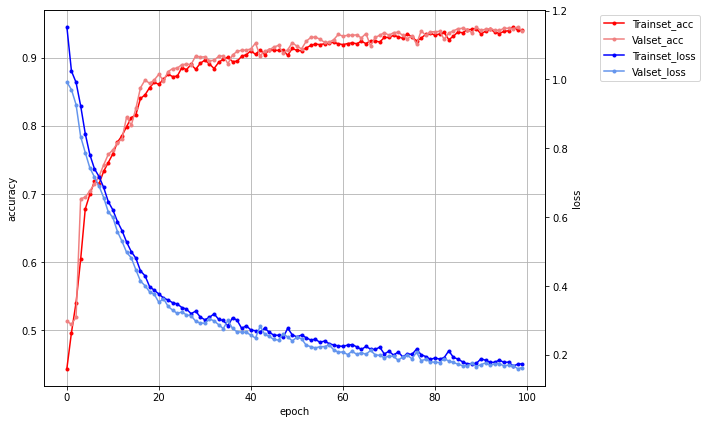

In [42]:
# result for FFT
acc= history_fft.history['accuracy']
val_acc= history_fft.history['val_accuracy']
y_vloss = history_fft.history['val_loss']
y_loss = history_fft.history['loss']

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

x_len = np.arange(len(y_loss))

train_acc = ax1.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
val_acc = ax1.plot(x_len, val_acc, marker='.', c="lightcoral", label='Valset_acc')
train_loss = ax2.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
val_loss = ax2.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Valset_loss')

# added these lines
lns = train_acc + val_acc + train_loss + val_loss
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, bbox_to_anchor=(1.1, 1), loc='upper left')
ax1.grid()
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
fig.tight_layout()
plt.show()

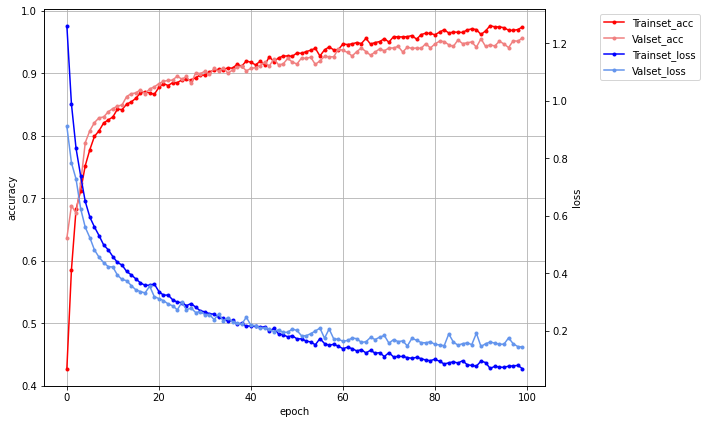

In [43]:
# result for STFT_3d
acc= history_stft_3d.history['accuracy']
val_acc= history_stft_3d.history['val_accuracy']
y_vloss = history_stft_3d.history['val_loss']
y_loss = history_stft_3d.history['loss']

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

x_len = np.arange(len(y_loss))

train_acc = ax1.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
val_acc = ax1.plot(x_len, val_acc, marker='.', c="lightcoral", label='Valset_acc')
train_loss = ax2.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
val_loss = ax2.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Valset_loss')

# added these lines
lns = train_acc + val_acc + train_loss + val_loss
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, bbox_to_anchor=(1.1, 1), loc='upper left')
ax1.grid()
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
fig.tight_layout()
plt.show()

In [44]:
# generate seizure-class array
y_test_class = np.argmax(y_test, axis=-1)

predict_fft = model_fft.predict(fft_x_test)
predict_fft_class = np.argmax(model_fft.predict(fft_x_test), axis=-1)

predict_stft_3d = model_stft_3d.predict(stft_x_test_3d)
predict_stft_3d_class = np.argmax(model_stft_3d.predict(stft_x_test_3d), axis=-1)

Evaluate on test data : FFT
13/13 [==============================] - 2s 164ms/step - loss: 0.1634 - accuracy: 0.9474
test loss by FFT : 0.163363, test acc by FFT: 0.9474
confusion matrix
     0    1    2   3
0  760   27    5   1
1   35  560    0   3
2    9    0  137   1
3    0    0    1  19
accuracy : 0.9474
precision : 0.9122
recall : 0.9442
F-1 score : 0.9263


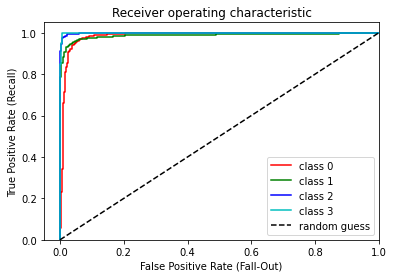

ROC AUC 값 : 0.9922


In [77]:
##Evaluation : FFT
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
import pandas as pd

print("Evaluate on test data : FFT")
results_fft = model_fft.evaluate(fft_x_test, y_test, batch_size=128)
print("test loss by FFT : {0:4f}, test acc by FFT: {1:.4f}".format(results_fft[0], results_fft[1]))

# Confution Matrix
confusion = confusion_matrix(y_test_class,predict_fft_class)
df = pd.DataFrame(confusion)
print('confusion matrix')
print(df)

# Accuracy, Precision, Recall
accuracy = accuracy_score(y_test_class,predict_fft_class)
precision = precision_score(y_test_class,predict_fft_class, average = 'macro')
recall = recall_score(y_test_class,predict_fft_class, average = 'macro')
print('accuracy : {0:.4f}'.format(accuracy))
print('precision : {0:.4f}'.format(precision))
print('recall : {0:.4f}'.format(recall))

# F-1 Score
f1 = f1_score(y_test_class, predict_fft_class, average = 'macro')
print('F-1 score : {0:.4f}'.format(f1))

#ROC Curve
# 내용
y_class0 = y_test[:,0]
pred_class0 = predict_fft[:, 0]
y_class1 = y_test[:,1]
pred_class1 = predict_fft[:, 1]
y_class2 = y_test[:,2]
pred_class2 = predict_fft[:, 2]
y_class3 = y_test[:,3]
pred_class3 = predict_fft[:, 3]

fprs0, tprs0, thresholds0 = roc_curve(y_class0, pred_class0)
fprs1, tprs1, thresholds1 = roc_curve(y_class1, pred_class1)
fprs2, tprs2, thresholds2 = roc_curve(y_class2, pred_class2)
fprs3, tprs3, thresholds3 = roc_curve(y_class3, pred_class3)

plt.plot(fprs0, tprs0, "r-", label="class 0 ")
plt.plot(fprs1, tprs1, "g-", label="class 1")
plt.plot(fprs2, tprs2, "b-", label="class 2")
plt.plot(fprs3, tprs3, "c-", label="class 3")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlim(-0.05, 1.0)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#ROC AUC Score
roc_score = roc_auc_score(y_test, predict_fft)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

Evaluate on test data : STFT_3d
13/13 [==============================] - 3s 231ms/step - loss: 0.1412 - accuracy: 0.9525
test loss by STFT : 0.141225, test acc by STFT: 0.9525
confusion matrix
     0    1    2   3
0  757   31    4   1
1   26  565    2   5
2    3    1  143   0
3    1    0    0  19
accuracy : 0.9525
precision : 0.9070
recall : 0.9556
F-1 score : 0.9286


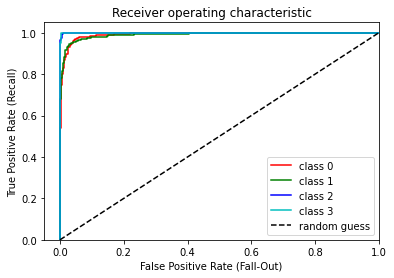

ROC AUC 값 : 0.9953


In [78]:
##Evaluation : STFT_3d

print("Evaluate on test data : STFT_3d")
results_stft = model_stft_3d.evaluate(stft_x_test_3d, y_test, batch_size=128)
print("test loss by STFT : {0:4f}, test acc by STFT: {1:.4f}".format(results_stft[0], results_stft[1]))

# Confution Matrix
confusion = confusion_matrix(y_test_class,predict_stft_3d_class)
df = pd.DataFrame(confusion)
print('confusion matrix')
print(df)

# Accuracy, Precision, Recall
accuracy = accuracy_score(y_test_class,predict_stft_3d_class)
precision = precision_score(y_test_class,predict_stft_3d_class, average = 'macro')
recall = recall_score(y_test_class,predict_stft_3d_class, average = 'macro')
print('accuracy : {0:.4f}'.format(accuracy))
print('precision : {0:.4f}'.format(precision))
print('recall : {0:.4f}'.format(recall))

# F-1 Score
f1 = f1_score(y_test_class, predict_stft_3d_class, average = 'macro')
print('F-1 score : {0:.4f}'.format(f1))

#ROC Curve
# 레이블 값이 1일떄의 예측 확률을 추출
y_class0 = y_test[:,0]
pred_class0 = predict_stft_3d[:, 0]
y_class1 = y_test[:,1]
pred_class1 = predict_stft_3d[:, 1]
y_class2 = y_test[:,2]
pred_class2 = predict_stft_3d[:, 2]
y_class3 = y_test[:,3]
pred_class3 = predict_stft_3d[:, 3]

fprs0, tprs0, thresholds0 = roc_curve(y_class0, pred_class0)
fprs1, tprs1, thresholds1 = roc_curve(y_class1, pred_class1)
fprs2, tprs2, thresholds2 = roc_curve(y_class2, pred_class2)
fprs3, tprs3, thresholds3 = roc_curve(y_class3, pred_class3)

plt.plot(fprs0, tprs0, "r-", label="class 0 ")
plt.plot(fprs1, tprs1, "g-", label="class 1")
plt.plot(fprs2, tprs2, "b-", label="class 2")
plt.plot(fprs3, tprs3, "c-", label="class 3")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlim(-0.05, 1.0)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#ROC AUC Score
roc_score = roc_auc_score(y_test, predict_stft_3d)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))